In [67]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import optuna
# import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
#plt.style.use('fivethirtyeight')
import xgboost as xgb
import sklearn
import random
from NecessaryModules.getData import getData
from NecessaryModules.splitData import split_data

In [68]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error

In [69]:
filename = 'Dataset/ionosphere.csv'
dataset,label=getData(filename)
# dataset=pd.DataFrame(dataset) #from dataset_list to dataset_dataframe after suffling
print(dataset)
print(label)

[[1.0, 0.0, 0.99539, -0.05889, 0.85243, 0.02306, 0.83398, -0.37708, 1.0, 0.0376, 0.85243, -0.17755, 0.59755, -0.44945, 0.60536, -0.38223, 0.84356, -0.38542, 0.58212, -0.32192, 0.56971, -0.29674, 0.36946, -0.47357, 0.56811, -0.51171, 0.41078, -0.46168, 0.21266, -0.3409, 0.42267, -0.54487, 0.18641, -0.453], [1.0, 0.0, 1.0, -0.18829, 0.93035, -0.36156, -0.10868, -0.93597, 1.0, -0.04549, 0.50874, -0.67743, 0.34432, -0.69707, -0.51685, -0.97515, 0.05499, -0.62237, 0.33109, -1.0, -0.13151, -0.453, -0.18056, -0.35734, -0.20332, -0.26569, -0.20468, -0.18401, -0.1904, -0.11593, -0.16626, -0.06288, -0.13738, -0.02447], [1.0, 0.0, 1.0, -0.03365, 1.0, 0.00485, 1.0, -0.12062, 0.88965, 0.01198, 0.73082, 0.05346, 0.85443, 0.00827, 0.54591, 0.00299, 0.83775, -0.13644, 0.75535, -0.0854, 0.70887, -0.27502, 0.43385, -0.12062, 0.57528, -0.4022, 0.58984, -0.22145, 0.431, -0.17365, 0.60436, -0.2418, 0.56045, -0.38238], [1.0, 0.0, 1.0, -0.45161, 1.0, 1.0, 0.71216, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.

# RFE implement

In [70]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR


estimator = SVR(kernel="linear")
model = RFE(estimator, n_features_to_select=10, step=1)
model.fit(dataset,label)



RFE(estimator=SVR(kernel='linear'), n_features_to_select=10)

In [71]:

compressed_dataset_X= model.transform(dataset) # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters
print(type(compressed_dataset_X))
print(len(compressed_dataset_X[0]))
print(compressed_dataset_X)

<class 'numpy.ndarray'>
10
[[ 1.0000e+00  9.9539e-01 -5.8890e-02 ... -5.1171e-01  4.1078e-01
   4.2267e-01]
 [ 1.0000e+00  1.0000e+00 -1.8829e-01 ... -2.6569e-01 -2.0468e-01
  -1.6626e-01]
 [ 1.0000e+00  1.0000e+00 -3.3650e-02 ... -4.0220e-01  5.8984e-01
   6.0436e-01]
 ...
 [ 1.0000e+00  9.4701e-01 -3.4000e-04 ...  3.1930e-02  9.2489e-01
   9.2459e-01]
 [ 1.0000e+00  9.0608e-01 -1.6570e-02 ... -2.0990e-02  8.9147e-01
   9.6022e-01]
 [ 1.0000e+00  8.4710e-01  1.3533e-01 ... -1.5114e-01  8.1147e-01
   7.5747e-01]]


In [72]:
# from NecessaryModules.splitData import split_data
X_train, y_train, X_test, y_test = split_data(dataset,label)
print(len(X_train[0]))

34


In [73]:
compressed_dataset_X_train= model.transform(X_train) # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters
print(type(compressed_dataset_X_train))
print(len(compressed_dataset_X_train))
print(compressed_dataset_X_train)

compressed_dataset_X_test= model.transform(X_test) # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters
print(type(compressed_dataset_X_test))
print(len(compressed_dataset_X_test))
print(compressed_dataset_X_test)

<class 'numpy.ndarray'>
240
[[ 1.0000e+00  9.0932e-01  8.7910e-02 ...  5.6527e-01  1.8626e-01
   6.9270e-02]
 [ 1.0000e+00  2.9073e-01  1.0025e-01 ... -1.5050e-02 -8.8600e-03
   9.6000e-04]
 [ 1.0000e+00  5.0000e-01  0.0000e+00 ... -8.7000e-03  4.1789e-01
   3.5217e-01]
 ...
 [ 1.0000e+00  1.0000e+00 -2.8428e-01 ... -7.3333e-01  3.5504e-01
   1.6604e-01]
 [ 0.0000e+00  1.0000e+00  1.0000e+00 ... -1.0000e+00  1.0000e+00
   1.0000e+00]
 [ 1.0000e+00  9.4052e-01 -1.5310e-02 ... -4.4760e-02  9.2695e-01
   9.1991e-01]]
<class 'numpy.ndarray'>
111
[[ 1.       0.95659  0.08143 ... -0.40747  0.87244  0.83951]
 [ 1.       1.      -0.02259 ... -0.92284  0.8728   0.78479]
 [ 1.       0.66161 -1.      ...  0.85357  1.       1.     ]
 ...
 [ 1.       0.       0.      ...  0.       1.       0.     ]
 [ 1.      -0.205    0.2875  ... -0.24     0.3219  -0.27104]
 [ 1.       0.       0.      ...  0.       1.       1.     ]]


# tune XG Boost

In [74]:
# train the model with random parameter

# Preparing the regressor and fitting data with some parameters
xg_reg = xgb.XGBRegressor(objective ='reg:linear', 
                          colsample_bytree = 1, 
                          learning_rate = 0.3,
                          max_depth = 15, 
                          alpha = 10, 
                          n_estimators = 100, 
                          verbose=1, 
                          min_child_weight = 1, 
                          colsample_bylevel = 1, 
                          reg_alpha = 2) 

xg_reg.fit(compressed_dataset_X_train, y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.3, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=15,
             max_leaves=None, min_child_weight=1, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [75]:
# Finding mean absolute error
preds = xg_reg.predict(compressed_dataset_X_test)
preds = preds.astype(int)
mae = np.abs(y_test-preds).mean()
mae

0.5225225225225225

In [76]:
# Defining the best parameter with optuna
from sklearn.model_selection import KFold
K = 5 # 5 fold cross validation
kf = KFold(n_splits = K, random_state = 42, shuffle = True)


train_tunned = np.array(compressed_dataset_X)
target_train_tunned = np.array(label)

# test = np.array(X)
# target_train = df_train['congestion'].values

# test_preds = np.zeros((len(test)))
oof_preds = np.zeros((len(train_tunned)))
abs_error_arr=[]
def objective(trial):

 for train_index, val_index in (kf.split(compressed_dataset_X)):
    train_X, valid_X = train_tunned[train_index], train_tunned[val_index]
    train_Y, valid_Y = target_train_tunned[train_index], target_train_tunned[val_index]
    
        
        # train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.25,random_state=0)
    param = {
            # 'tree_method':'gpu_hist',  # this parameter means using the GPU when training our model to speedup the training process 
            'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
            'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
            'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
            'colsample_bylevel': trial.suggest_categorical('colsample_bylevel', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
            'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
            'learning_rate': trial.suggest_categorical('learning_rate', [1e-5,1e-4,1e-3,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01,0.04,0.08,0.12,0.20, 0.24, 0.30, 0.38, 0.42, 0.48, 0.50, 0.60, 0.70, 0.80, 0.90, 1.0]),
            'n_estimators': trial.suggest_int('n_estimators', 1, 300),
            'max_depth': trial.suggest_categorical('max_depth', [5,7,9,11,13,15,17,20,25,30,35,40]),
            'random_state': trial.suggest_categorical('random_state', [24,48,2020]),
            'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
        }
    model = xgb.XGBRegressor(**param)  
        
    model.fit(train_X,train_Y,eval_set=[(valid_X,valid_Y)],early_stopping_rounds=100,verbose=False)
        
    preds = model.predict(valid_X)
    oof_preds[val_index] = preds # preds gives total 3846 predicted value for valid_X


 
 print(len(oof_preds))
      
 mae = mean_absolute_error(target_train_tunned, oof_preds)
        
 return mae

In [77]:
# this is the main optuna for optimizing a object-->"objective"
study = optuna.create_study(direction='minimize',study_name="XG_tune")

[I 2024-02-10 23:07:22,243] A new study created in memory with name: XG_tune


In [78]:

study.optimize(objective, n_trials=100) # 150 bar "objective" object ke trial kore kore dekhbe, here total 5*100=750
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2024-02-10 23:07:22,501] Trial 0 finished with value: 0.2792649158884232 and parameters: {'lambda': 0.03131937998846196, 'alpha': 0.001912003509022964, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.5, 'subsample': 0.6, 'learning_rate': 0.2, 'n_estimators': 60, 'max_depth': 13, 'random_state': 48, 'min_child_weight': 70}. Best is trial 0 with value: 0.2792649158884232.


351


[I 2024-02-10 23:07:22,942] Trial 1 finished with value: 0.271568362816022 and parameters: {'lambda': 0.008161545531588495, 'alpha': 0.014590734818533886, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.9, 'subsample': 0.7, 'learning_rate': 0.7, 'n_estimators': 147, 'max_depth': 5, 'random_state': 48, 'min_child_weight': 86}. Best is trial 1 with value: 0.271568362816022.


351


[I 2024-02-10 23:07:23,217] Trial 2 finished with value: 0.44077281921337813 and parameters: {'lambda': 0.0036517666438147817, 'alpha': 0.008228008772356714, 'colsample_bytree': 0.4, 'colsample_bylevel': 0.4, 'subsample': 1.0, 'learning_rate': 0.003, 'n_estimators': 75, 'max_depth': 17, 'random_state': 24, 'min_child_weight': 61}. Best is trial 1 with value: 0.271568362816022.


351


[I 2024-02-10 23:07:23,947] Trial 3 finished with value: 0.17889228404666752 and parameters: {'lambda': 0.017111905386573353, 'alpha': 0.001443843139588444, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.9, 'subsample': 0.7, 'learning_rate': 0.08, 'n_estimators': 222, 'max_depth': 30, 'random_state': 24, 'min_child_weight': 40}. Best is trial 3 with value: 0.17889228404666752.


351


[I 2024-02-10 23:07:24,732] Trial 4 finished with value: 0.17673722972517616 and parameters: {'lambda': 0.22751644360947648, 'alpha': 0.013362540288680395, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.5, 'subsample': 1.0, 'learning_rate': 0.2, 'n_estimators': 237, 'max_depth': 40, 'random_state': 24, 'min_child_weight': 51}. Best is trial 4 with value: 0.17673722972517616.


351


[I 2024-02-10 23:07:25,082] Trial 5 finished with value: 0.4611681728621154 and parameters: {'lambda': 0.017498334464786422, 'alpha': 0.12930935058837295, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.6, 'subsample': 0.6, 'learning_rate': 0.004, 'n_estimators': 142, 'max_depth': 30, 'random_state': 24, 'min_child_weight': 133}. Best is trial 4 with value: 0.17673722972517616.


351


[I 2024-02-10 23:07:25,342] Trial 6 finished with value: 0.46136863550908885 and parameters: {'lambda': 0.0031147624025604764, 'alpha': 0.7619278013572481, 'colsample_bytree': 0.4, 'colsample_bylevel': 0.5, 'subsample': 0.4, 'learning_rate': 0.008, 'n_estimators': 189, 'max_depth': 5, 'random_state': 24, 'min_child_weight': 137}. Best is trial 4 with value: 0.17673722972517616.


351
351


[I 2024-02-10 23:07:25,522] Trial 7 finished with value: 0.46136863550908885 and parameters: {'lambda': 3.920118050016917, 'alpha': 2.3174213734813986, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.9, 'subsample': 0.4, 'learning_rate': 0.9, 'n_estimators': 62, 'max_depth': 20, 'random_state': 2020, 'min_child_weight': 286}. Best is trial 4 with value: 0.17673722972517616.
[I 2024-02-10 23:07:25,862] Trial 8 finished with value: 0.4585458851947404 and parameters: {'lambda': 0.01995441121938307, 'alpha': 1.9533315256369483, 'colsample_bytree': 0.3, 'colsample_bylevel': 0.7, 'subsample': 0.4, 'learning_rate': 0.2, 'n_estimators': 164, 'max_depth': 13, 'random_state': 48, 'min_child_weight': 84}. Best is trial 4 with value: 0.17673722972517616.
[I 2024-02-10 23:07:26,022] Trial 9 finished with value: 0.46136863550908885 and parameters: {'lambda': 2.645961498889008, 'alpha': 0.0505686899874918, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.6, 'subsample': 1.0, 'learning_rate': 0.01, 'n_

351
351


[I 2024-02-10 23:07:28,207] Trial 10 finished with value: 0.4515975489575639 and parameters: {'lambda': 0.35275452602833457, 'alpha': 0.12063399261804876, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.8, 'subsample': 0.8, 'learning_rate': 0.0001, 'n_estimators': 300, 'max_depth': 40, 'random_state': 24, 'min_child_weight': 3}. Best is trial 4 with value: 0.17673722972517616.


351


[I 2024-02-10 23:07:29,932] Trial 11 finished with value: 0.1277909403672824 and parameters: {'lambda': 0.17175749603283455, 'alpha': 0.0010653379461505548, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.3, 'subsample': 0.7, 'learning_rate': 0.08, 'n_estimators': 251, 'max_depth': 30, 'random_state': 24, 'min_child_weight': 5}. Best is trial 11 with value: 0.1277909403672824.


351


[I 2024-02-10 23:07:30,972] Trial 12 finished with value: 0.15256951934660645 and parameters: {'lambda': 0.21251145419080691, 'alpha': 0.006423120822099171, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.3, 'subsample': 0.5, 'learning_rate': 0.08, 'n_estimators': 271, 'max_depth': 35, 'random_state': 24, 'min_child_weight': 12}. Best is trial 11 with value: 0.1277909403672824.


351


[I 2024-02-10 23:07:32,062] Trial 13 finished with value: 0.1576937653026159 and parameters: {'lambda': 0.7790581597548047, 'alpha': 0.003767237487807299, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.3, 'subsample': 0.5, 'learning_rate': 0.08, 'n_estimators': 293, 'max_depth': 35, 'random_state': 24, 'min_child_weight': 13}. Best is trial 11 with value: 0.1277909403672824.


351


[I 2024-02-10 23:07:32,817] Trial 14 finished with value: 0.46136863550908885 and parameters: {'lambda': 0.08729376595028457, 'alpha': 0.0011306622794850145, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.3, 'subsample': 0.5, 'learning_rate': 0.08, 'n_estimators': 257, 'max_depth': 35, 'random_state': 24, 'min_child_weight': 216}. Best is trial 11 with value: 0.1277909403672824.


351


[I 2024-02-10 23:07:33,757] Trial 15 finished with value: 0.15920274463904083 and parameters: {'lambda': 1.0723223256781462, 'alpha': 0.03286884299327336, 'colsample_bytree': 0.5, 'colsample_bylevel': 1.0, 'subsample': 0.5, 'learning_rate': 0.42, 'n_estimators': 262, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 1}. Best is trial 11 with value: 0.1277909403672824.
[I 2024-02-10 23:07:33,878] Trial 16 finished with value: 0.4629229322457925 and parameters: {'lambda': 0.0619875839572471, 'alpha': 0.004691846858798011, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.3, 'subsample': 0.7, 'learning_rate': 0.5, 'n_estimators': 1, 'max_depth': 25, 'random_state': 24, 'min_child_weight': 110}. Best is trial 11 with value: 0.1277909403672824.


351
351


[I 2024-02-10 23:07:34,237] Trial 17 finished with value: 0.46136863550908885 and parameters: {'lambda': 8.886465072046684, 'alpha': 8.955561874686163, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.3, 'subsample': 0.8, 'learning_rate': 0.04, 'n_estimators': 197, 'max_depth': 11, 'random_state': 24, 'min_child_weight': 170}. Best is trial 11 with value: 0.1277909403672824.


351


[I 2024-02-10 23:07:34,962] Trial 18 finished with value: 0.18335479043757125 and parameters: {'lambda': 0.22356617190034903, 'alpha': 0.0032742153823308866, 'colsample_bytree': 0.3, 'colsample_bylevel': 0.3, 'subsample': 0.7, 'learning_rate': 0.48, 'n_estimators': 267, 'max_depth': 15, 'random_state': 2020, 'min_child_weight': 25}. Best is trial 11 with value: 0.1277909403672824.


351


[I 2024-02-10 23:07:35,327] Trial 19 finished with value: 0.46136863550908885 and parameters: {'lambda': 0.5500519159076953, 'alpha': 0.033918424605830076, 'colsample_bytree': 0.7, 'colsample_bylevel': 1.0, 'subsample': 0.5, 'learning_rate': 0.002, 'n_estimators': 216, 'max_depth': 9, 'random_state': 48, 'min_child_weight': 168}. Best is trial 11 with value: 0.1277909403672824.


351


[I 2024-02-10 23:07:35,902] Trial 20 finished with value: 0.21725162540819826 and parameters: {'lambda': 0.12024905643124603, 'alpha': 0.3781008804237838, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.7, 'subsample': 0.5, 'learning_rate': 1.0, 'n_estimators': 100, 'max_depth': 35, 'random_state': 24, 'min_child_weight': 35}. Best is trial 11 with value: 0.1277909403672824.


351


[I 2024-02-10 23:07:37,967] Trial 21 finished with value: 0.1739261834676566 and parameters: {'lambda': 1.1874664370913313, 'alpha': 0.0043952810355812255, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.3, 'subsample': 0.5, 'learning_rate': 0.08, 'n_estimators': 300, 'max_depth': 35, 'random_state': 24, 'min_child_weight': 19}. Best is trial 11 with value: 0.1277909403672824.


351


[I 2024-02-10 23:07:41,302] Trial 22 finished with value: 0.14578640576595628 and parameters: {'lambda': 0.7756486272388381, 'alpha': 0.001072831697141611, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.3, 'subsample': 0.5, 'learning_rate': 0.08, 'n_estimators': 282, 'max_depth': 35, 'random_state': 24, 'min_child_weight': 1}. Best is trial 11 with value: 0.1277909403672824.


351


[I 2024-02-10 23:07:42,082] Trial 23 finished with value: 0.4610857002415888 and parameters: {'lambda': 1.993442887212396, 'alpha': 0.001083305017017865, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.3, 'subsample': 0.5, 'learning_rate': 0.009, 'n_estimators': 269, 'max_depth': 30, 'random_state': 24, 'min_child_weight': 106}. Best is trial 11 with value: 0.1277909403672824.


351


[I 2024-02-10 23:07:42,782] Trial 24 finished with value: 0.19124138619262523 and parameters: {'lambda': 0.00105361852481884, 'alpha': 0.002680246229540302, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.4, 'subsample': 0.7, 'learning_rate': 0.8, 'n_estimators': 245, 'max_depth': 35, 'random_state': 24, 'min_child_weight': 44}. Best is trial 11 with value: 0.1277909403672824.


351


[I 2024-02-10 23:07:44,162] Trial 25 finished with value: 0.2567930011413036 and parameters: {'lambda': 0.12433927243902501, 'alpha': 0.009241168052903204, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.8, 'subsample': 0.5, 'learning_rate': 0.006, 'n_estimators': 278, 'max_depth': 25, 'random_state': 24, 'min_child_weight': 27}. Best is trial 11 with value: 0.1277909403672824.


351


[I 2024-02-10 23:07:45,032] Trial 26 finished with value: 0.2181854314234458 and parameters: {'lambda': 0.36453560316038086, 'alpha': 0.002039251461765884, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.3, 'subsample': 0.8, 'learning_rate': 0.38, 'n_estimators': 229, 'max_depth': 9, 'random_state': 24, 'min_child_weight': 62}. Best is trial 11 with value: 0.1277909403672824.


351


[I 2024-02-10 23:07:46,397] Trial 27 finished with value: 0.14850738019207518 and parameters: {'lambda': 0.04307147069132555, 'alpha': 0.007731001024433643, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.3, 'subsample': 0.6, 'learning_rate': 0.3, 'n_estimators': 191, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 4}. Best is trial 11 with value: 0.1277909403672824.


351


[I 2024-02-10 23:07:46,827] Trial 28 finished with value: 0.46136863550908885 and parameters: {'lambda': 0.05233427540821209, 'alpha': 0.016970368531846178, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.3, 'subsample': 0.6, 'learning_rate': 0.3, 'n_estimators': 192, 'max_depth': 20, 'random_state': 2020, 'min_child_weight': 286}. Best is trial 11 with value: 0.1277909403672824.


351


[I 2024-02-10 23:07:47,402] Trial 29 finished with value: 0.4564196752686786 and parameters: {'lambda': 0.04473340949514445, 'alpha': 0.0021411248166797897, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.3, 'subsample': 0.6, 'learning_rate': 0.001, 'n_estimators': 123, 'max_depth': 15, 'random_state': 48, 'min_child_weight': 73}. Best is trial 11 with value: 0.1277909403672824.


351


[I 2024-02-10 23:07:47,837] Trial 30 finished with value: 0.46136863550908885 and parameters: {'lambda': 0.03291081828136294, 'alpha': 0.001004107251792632, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.4, 'subsample': 0.6, 'learning_rate': 0.007, 'n_estimators': 168, 'max_depth': 15, 'random_state': 48, 'min_child_weight': 221}. Best is trial 11 with value: 0.1277909403672824.


351


[I 2024-02-10 23:07:49,522] Trial 31 finished with value: 0.3990031436637596 and parameters: {'lambda': 0.1399693665929298, 'alpha': 0.006173833264646668, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.3, 'subsample': 0.6, 'learning_rate': 0.001, 'n_estimators': 209, 'max_depth': 7, 'random_state': 24, 'min_child_weight': 1}. Best is trial 11 with value: 0.1277909403672824.


351


[I 2024-02-10 23:07:50,452] Trial 32 finished with value: 0.18361821161436137 and parameters: {'lambda': 0.2506128863395961, 'alpha': 0.022589520885024715, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.3, 'subsample': 0.7, 'learning_rate': 0.6, 'n_estimators': 250, 'max_depth': 11, 'random_state': 24, 'min_child_weight': 25}. Best is trial 11 with value: 0.1277909403672824.


351


[I 2024-02-10 23:07:51,612] Trial 33 finished with value: 0.4424072921785534 and parameters: {'lambda': 0.5528240516692344, 'alpha': 0.008895065086550465, 'colsample_bytree': 0.4, 'colsample_bylevel': 0.3, 'subsample': 0.6, 'learning_rate': 0.001, 'n_estimators': 280, 'max_depth': 17, 'random_state': 24, 'min_child_weight': 47}. Best is trial 11 with value: 0.1277909403672824.


351


[I 2024-02-10 23:07:52,497] Trial 34 finished with value: 0.23122641521153117 and parameters: {'lambda': 0.007799490548014937, 'alpha': 0.0017821748774286157, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.6, 'subsample': 0.7, 'learning_rate': 0.24, 'n_estimators': 241, 'max_depth': 30, 'random_state': 24, 'min_child_weight': 64}. Best is trial 11 with value: 0.1277909403672824.


351


[I 2024-02-10 23:07:54,672] Trial 35 finished with value: 0.22746036148648657 and parameters: {'lambda': 0.168573545607735, 'alpha': 0.006744081339752758, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.5, 'subsample': 1.0, 'learning_rate': 0.005, 'n_estimators': 285, 'max_depth': 13, 'random_state': 24, 'min_child_weight': 17}. Best is trial 11 with value: 0.1277909403672824.


351


[I 2024-02-10 23:07:55,447] Trial 36 finished with value: 0.46132300076661287 and parameters: {'lambda': 0.08417340607644642, 'alpha': 0.06308139719948665, 'colsample_bytree': 0.3, 'colsample_bylevel': 0.9, 'subsample': 0.5, 'learning_rate': 0.001, 'n_estimators': 229, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 85}. Best is trial 11 with value: 0.1277909403672824.


351


[I 2024-02-10 23:07:56,547] Trial 37 finished with value: 0.4609473554836719 and parameters: {'lambda': 0.0079010259039599, 'alpha': 0.2131552562178098, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.8, 'subsample': 0.7, 'learning_rate': 1e-05, 'n_estimators': 210, 'max_depth': 35, 'random_state': 24, 'min_child_weight': 42}. Best is trial 11 with value: 0.1277909403672824.


351


[I 2024-02-10 23:07:57,507] Trial 38 finished with value: 0.42489986677794717 and parameters: {'lambda': 0.023621787839648876, 'alpha': 0.012473848309791868, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.7, 'subsample': 0.6, 'learning_rate': 0.001, 'n_estimators': 174, 'max_depth': 30, 'random_state': 48, 'min_child_weight': 34}. Best is trial 11 with value: 0.1277909403672824.


351


[I 2024-02-10 23:07:58,027] Trial 39 finished with value: 0.45927328024155056 and parameters: {'lambda': 0.01192070786519659, 'alpha': 0.0015612899256902022, 'colsample_bytree': 0.4, 'colsample_bylevel': 1.0, 'subsample': 0.4, 'learning_rate': 0.12, 'n_estimators': 135, 'max_depth': 17, 'random_state': 24, 'min_child_weight': 108}. Best is trial 11 with value: 0.1277909403672824.


351


[I 2024-02-10 23:07:59,007] Trial 40 finished with value: 0.18148136927687863 and parameters: {'lambda': 0.39141215479906605, 'alpha': 0.002891987473163299, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.5, 'subsample': 1.0, 'learning_rate': 0.3, 'n_estimators': 255, 'max_depth': 40, 'random_state': 24, 'min_child_weight': 55}. Best is trial 11 with value: 0.1277909403672824.


351


[I 2024-02-10 23:08:00,627] Trial 41 finished with value: 0.1577252346970555 and parameters: {'lambda': 0.734954717368638, 'alpha': 0.003355075597119017, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.3, 'subsample': 0.5, 'learning_rate': 0.08, 'n_estimators': 292, 'max_depth': 35, 'random_state': 24, 'min_child_weight': 13}. Best is trial 11 with value: 0.1277909403672824.


351


[I 2024-02-10 23:08:02,252] Trial 42 finished with value: 0.15223771995835622 and parameters: {'lambda': 1.1516118148583272, 'alpha': 0.005070080460482194, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.3, 'subsample': 0.5, 'learning_rate': 0.08, 'n_estimators': 273, 'max_depth': 35, 'random_state': 24, 'min_child_weight': 10}. Best is trial 11 with value: 0.1277909403672824.


351


[I 2024-02-10 23:08:03,002] Trial 43 finished with value: 0.1905705040570168 and parameters: {'lambda': 2.0327197224463998, 'alpha': 0.006239788617538378, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.3, 'subsample': 0.5, 'learning_rate': 0.7, 'n_estimators': 275, 'max_depth': 35, 'random_state': 24, 'min_child_weight': 10}. Best is trial 11 with value: 0.1277909403672824.


351


[I 2024-02-10 23:08:06,487] Trial 44 finished with value: 0.12578788552893608 and parameters: {'lambda': 3.93202570447416, 'alpha': 0.014083614278402056, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.9, 'subsample': 0.5, 'learning_rate': 0.08, 'n_estimators': 232, 'max_depth': 35, 'random_state': 24, 'min_child_weight': 1}. Best is trial 44 with value: 0.12578788552893608.


351


[I 2024-02-10 23:08:07,612] Trial 45 finished with value: 0.3732353282450271 and parameters: {'lambda': 5.385719218189471, 'alpha': 0.013188151904141993, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.9, 'subsample': 0.5, 'learning_rate': 0.003, 'n_estimators': 233, 'max_depth': 5, 'random_state': 24, 'min_child_weight': 33}. Best is trial 44 with value: 0.12578788552893608.


351


[I 2024-02-10 23:08:09,796] Trial 46 finished with value: 0.13135525558350813 and parameters: {'lambda': 3.591785948360029, 'alpha': 0.022326338118493584, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.9, 'subsample': 0.4, 'learning_rate': 0.08, 'n_estimators': 184, 'max_depth': 30, 'random_state': 2020, 'min_child_weight': 2}. Best is trial 44 with value: 0.12578788552893608.


351


[I 2024-02-10 23:08:10,316] Trial 47 finished with value: 0.4613204430311154 and parameters: {'lambda': 4.005176998021967, 'alpha': 0.0215051882603411, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.9, 'subsample': 0.4, 'learning_rate': 0.001, 'n_estimators': 180, 'max_depth': 30, 'random_state': 2020, 'min_child_weight': 76}. Best is trial 44 with value: 0.12578788552893608.


351


[I 2024-02-10 23:08:11,116] Trial 48 finished with value: 0.40877124828490774 and parameters: {'lambda': 7.508019271734972, 'alpha': 0.05208885504021308, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.9, 'subsample': 0.4, 'learning_rate': 0.008, 'n_estimators': 200, 'max_depth': 20, 'random_state': 2020, 'min_child_weight': 52}. Best is trial 44 with value: 0.12578788552893608.


351


[I 2024-02-10 23:08:12,335] Trial 49 finished with value: 0.42182834637470734 and parameters: {'lambda': 3.4983098146402627, 'alpha': 0.08453239446631437, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.9, 'subsample': 0.4, 'learning_rate': 0.001, 'n_estimators': 156, 'max_depth': 30, 'random_state': 2020, 'min_child_weight': 2}. Best is trial 44 with value: 0.12578788552893608.


351


[I 2024-02-10 23:08:12,785] Trial 50 finished with value: 0.46136863550908885 and parameters: {'lambda': 2.209770065642847, 'alpha': 0.026382225868227995, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.9, 'subsample': 0.4, 'learning_rate': 0.001, 'n_estimators': 182, 'max_depth': 30, 'random_state': 2020, 'min_child_weight': 237}. Best is trial 44 with value: 0.12578788552893608.


351


[I 2024-02-10 23:08:13,985] Trial 51 finished with value: 0.1552169009316129 and parameters: {'lambda': 1.3127227919287825, 'alpha': 0.009973285138237717, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.9, 'subsample': 0.5, 'learning_rate': 0.08, 'n_estimators': 220, 'max_depth': 13, 'random_state': 2020, 'min_child_weight': 19}. Best is trial 44 with value: 0.12578788552893608.


351


[I 2024-02-10 23:08:17,324] Trial 52 finished with value: 0.11336179174107375 and parameters: {'lambda': 1.5454212601551214, 'alpha': 0.004752970605336839, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.6, 'subsample': 0.8, 'learning_rate': 0.08, 'n_estimators': 256, 'max_depth': 35, 'random_state': 24, 'min_child_weight': 1}. Best is trial 52 with value: 0.11336179174107375.


351


[I 2024-02-10 23:08:20,333] Trial 53 finished with value: 0.3973367893458092 and parameters: {'lambda': 5.436614067944101, 'alpha': 0.0013626995499158336, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.6, 'subsample': 0.8, 'learning_rate': 0.001, 'n_estimators': 241, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 1}. Best is trial 52 with value: 0.11336179174107375.


351


[I 2024-02-10 23:08:21,743] Trial 54 finished with value: 0.4015126362485424 and parameters: {'lambda': 2.934066376213199, 'alpha': 0.04158014432260195, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.6, 'subsample': 0.8, 'learning_rate': 0.001, 'n_estimators': 255, 'max_depth': 35, 'random_state': 2020, 'min_child_weight': 27}. Best is trial 52 with value: 0.11336179174107375.


351


[I 2024-02-10 23:08:22,173] Trial 55 finished with value: 0.46136863550908885 and parameters: {'lambda': 1.5174740905720734, 'alpha': 0.0021377913352999146, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.6, 'subsample': 0.8, 'learning_rate': 0.001, 'n_estimators': 158, 'max_depth': 40, 'random_state': 24, 'min_child_weight': 300}. Best is trial 52 with value: 0.11336179174107375.


351


[I 2024-02-10 23:08:23,245] Trial 56 finished with value: 0.3838628101722467 and parameters: {'lambda': 0.8773769109216771, 'alpha': 0.017374420792548983, 'colsample_bytree': 0.3, 'colsample_bylevel': 0.4, 'subsample': 0.8, 'learning_rate': 0.004, 'n_estimators': 203, 'max_depth': 25, 'random_state': 48, 'min_child_weight': 36}. Best is trial 52 with value: 0.11336179174107375.


351


[I 2024-02-10 23:08:24,315] Trial 57 finished with value: 0.14449597016093652 and parameters: {'lambda': 6.45291587307548, 'alpha': 0.004459071415543046, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.6, 'subsample': 0.7, 'learning_rate': 0.08, 'n_estimators': 146, 'max_depth': 7, 'random_state': 24, 'min_child_weight': 19}. Best is trial 52 with value: 0.11336179174107375.


351


[I 2024-02-10 23:08:25,094] Trial 58 finished with value: 0.4352125387925368 and parameters: {'lambda': 5.631928101742443, 'alpha': 0.0042891040192888355, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.6, 'subsample': 0.7, 'learning_rate': 0.001, 'n_estimators': 119, 'max_depth': 7, 'random_state': 24, 'min_child_weight': 20}. Best is trial 52 with value: 0.11336179174107375.


351
351


[I 2024-02-10 23:08:25,280] Trial 59 finished with value: 0.4612112668504742 and parameters: {'lambda': 8.211238756605862, 'alpha': 0.002483330961335205, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.6, 'subsample': 0.7, 'learning_rate': 0.08, 'n_estimators': 3, 'max_depth': 7, 'random_state': 24, 'min_child_weight': 153}. Best is trial 52 with value: 0.11336179174107375.
[I 2024-02-10 23:08:25,850] Trial 60 finished with value: 0.4581064522436202 and parameters: {'lambda': 4.176806863647058, 'alpha': 0.0015255584406617755, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.6, 'subsample': 0.7, 'learning_rate': 0.001, 'n_estimators': 112, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 95}. Best is trial 52 with value: 0.11336179174107375.


351


[I 2024-02-10 23:08:27,690] Trial 61 finished with value: 0.1325172730661833 and parameters: {'lambda': 1.6878843786099205, 'alpha': 0.011723293290208447, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.9, 'subsample': 0.7, 'learning_rate': 0.08, 'n_estimators': 263, 'max_depth': 9, 'random_state': 24, 'min_child_weight': 10}. Best is trial 52 with value: 0.11336179174107375.


351


[I 2024-02-10 23:08:29,384] Trial 62 finished with value: 0.13986542994856963 and parameters: {'lambda': 2.878502123695396, 'alpha': 0.011475378086845268, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.9, 'subsample': 0.7, 'learning_rate': 0.08, 'n_estimators': 262, 'max_depth': 9, 'random_state': 24, 'min_child_weight': 15}. Best is trial 52 with value: 0.11336179174107375.


351


[I 2024-02-10 23:08:30,440] Trial 63 finished with value: 0.4228464735199583 and parameters: {'lambda': 2.7295990830083583, 'alpha': 0.010833744127547755, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.9, 'subsample': 0.7, 'learning_rate': 0.001, 'n_estimators': 144, 'max_depth': 9, 'random_state': 24, 'min_child_weight': 13}. Best is trial 52 with value: 0.11336179174107375.


351


[I 2024-02-10 23:08:31,809] Trial 64 finished with value: 0.1508455054793524 and parameters: {'lambda': 1.5979113746869762, 'alpha': 0.03142315784781042, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.9, 'subsample': 0.7, 'learning_rate': 0.08, 'n_estimators': 262, 'max_depth': 9, 'random_state': 24, 'min_child_weight': 26}. Best is trial 52 with value: 0.11336179174107375.


351


[I 2024-02-10 23:08:33,065] Trial 65 finished with value: 0.4148649009544286 and parameters: {'lambda': 6.39361361677621, 'alpha': 0.015121068126499987, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.9, 'subsample': 0.7, 'learning_rate': 0.001, 'n_estimators': 249, 'max_depth': 9, 'random_state': 24, 'min_child_weight': 42}. Best is trial 52 with value: 0.11336179174107375.


351


[I 2024-02-10 23:08:34,329] Trial 66 finished with value: 0.2097071373352298 and parameters: {'lambda': 9.80034656521102, 'alpha': 0.005146842417216595, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.9, 'subsample': 0.7, 'learning_rate': 0.01, 'n_estimators': 226, 'max_depth': 9, 'random_state': 24, 'min_child_weight': 31}. Best is trial 52 with value: 0.11336179174107375.


351


[I 2024-02-10 23:08:35,785] Trial 67 finished with value: 0.4065385365757847 and parameters: {'lambda': 3.0879565111313454, 'alpha': 0.019507768032736954, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.7, 'subsample': 0.7, 'learning_rate': 0.001, 'n_estimators': 264, 'max_depth': 9, 'random_state': 24, 'min_child_weight': 18}. Best is trial 52 with value: 0.11336179174107375.


351


[I 2024-02-10 23:08:37,894] Trial 68 finished with value: 0.1295047784349357 and parameters: {'lambda': 4.425069057739411, 'alpha': 0.007833203857123145, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.9, 'subsample': 0.7, 'learning_rate': 0.08, 'n_estimators': 238, 'max_depth': 11, 'random_state': 48, 'min_child_weight': 9}. Best is trial 52 with value: 0.11336179174107375.


351


[I 2024-02-10 23:08:38,859] Trial 69 finished with value: 0.2101185175502657 and parameters: {'lambda': 1.796944769436907, 'alpha': 0.008520552862484742, 'colsample_bytree': 0.4, 'colsample_bylevel': 0.9, 'subsample': 0.7, 'learning_rate': 0.2, 'n_estimators': 244, 'max_depth': 11, 'random_state': 48, 'min_child_weight': 54}. Best is trial 52 with value: 0.11336179174107375.


351


[I 2024-02-10 23:08:40,484] Trial 70 finished with value: 0.4031591218421262 and parameters: {'lambda': 4.328200056476615, 'alpha': 0.012886338959795029, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.9, 'subsample': 1.0, 'learning_rate': 0.001, 'n_estimators': 212, 'max_depth': 11, 'random_state': 48, 'min_child_weight': 8}. Best is trial 52 with value: 0.11336179174107375.


351


[I 2024-02-10 23:08:41,789] Trial 71 finished with value: 0.14198873889668343 and parameters: {'lambda': 2.456828238245525, 'alpha': 0.003910635626200934, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.9, 'subsample': 0.7, 'learning_rate': 0.08, 'n_estimators': 221, 'max_depth': 11, 'random_state': 48, 'min_child_weight': 20}. Best is trial 52 with value: 0.11336179174107375.


351


[I 2024-02-10 23:08:42,430] Trial 72 finished with value: 0.4578394482278416 and parameters: {'lambda': 3.010246074604146, 'alpha': 0.0036358811686925873, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.9, 'subsample': 0.7, 'learning_rate': 0.9, 'n_estimators': 220, 'max_depth': 11, 'random_state': 48, 'min_child_weight': 127}. Best is trial 52 with value: 0.11336179174107375.


351


[I 2024-02-10 23:08:44,245] Trial 73 finished with value: 0.1318648878922434 and parameters: {'lambda': 2.113502762562555, 'alpha': 0.0060884348685370385, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.9, 'subsample': 0.7, 'learning_rate': 0.08, 'n_estimators': 234, 'max_depth': 11, 'random_state': 48, 'min_child_weight': 11}. Best is trial 52 with value: 0.11336179174107375.


351


[I 2024-02-10 23:08:45,449] Trial 74 finished with value: 0.13955249947540865 and parameters: {'lambda': 0.5586811412481321, 'alpha': 0.006807938638079119, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.9, 'subsample': 0.7, 'learning_rate': 0.5, 'n_estimators': 233, 'max_depth': 11, 'random_state': 48, 'min_child_weight': 9}. Best is trial 52 with value: 0.11336179174107375.


351


[I 2024-02-10 23:08:46,195] Trial 75 finished with value: 0.1666243981060564 and parameters: {'lambda': 0.5835028142213237, 'alpha': 0.0075146922706969856, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.8, 'subsample': 0.8, 'learning_rate': 0.5, 'n_estimators': 241, 'max_depth': 11, 'random_state': 48, 'min_child_weight': 38}. Best is trial 52 with value: 0.11336179174107375.


351


[I 2024-02-10 23:08:48,044] Trial 76 finished with value: 0.3956670752617708 and parameters: {'lambda': 0.8946467079678839, 'alpha': 0.006676619955103345, 'colsample_bytree': 1.0, 'colsample_bylevel': 1.0, 'subsample': 0.7, 'learning_rate': 0.001, 'n_estimators': 231, 'max_depth': 11, 'random_state': 48, 'min_child_weight': 6}. Best is trial 52 with value: 0.11336179174107375.


351


[I 2024-02-10 23:08:49,139] Trial 77 finished with value: 0.42814521079729084 and parameters: {'lambda': 0.27558557612039525, 'alpha': 3.028138481218791, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.9, 'subsample': 0.4, 'learning_rate': 0.001, 'n_estimators': 236, 'max_depth': 11, 'random_state': 48, 'min_child_weight': 27}. Best is trial 52 with value: 0.11336179174107375.


351


[I 2024-02-10 23:08:49,940] Trial 78 finished with value: 0.46133334769143 and parameters: {'lambda': 1.39757798282998, 'alpha': 0.024938490331023754, 'colsample_bytree': 0.3, 'colsample_bylevel': 0.5, 'subsample': 0.7, 'learning_rate': 0.001, 'n_estimators': 255, 'max_depth': 30, 'random_state': 48, 'min_child_weight': 189}. Best is trial 52 with value: 0.11336179174107375.


351


[I 2024-02-10 23:08:50,715] Trial 79 finished with value: 0.15159325778983174 and parameters: {'lambda': 0.49195556793504813, 'alpha': 0.15645835727250845, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.9, 'subsample': 0.7, 'learning_rate': 0.5, 'n_estimators': 288, 'max_depth': 5, 'random_state': 48, 'min_child_weight': 11}. Best is trial 52 with value: 0.11336179174107375.


351


[I 2024-02-10 23:08:51,589] Trial 80 finished with value: 0.17693448723147906 and parameters: {'lambda': 1.0392243197551516, 'alpha': 0.005741168465207216, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.9, 'subsample': 0.8, 'learning_rate': 0.48, 'n_estimators': 205, 'max_depth': 11, 'random_state': 48, 'min_child_weight': 46}. Best is trial 52 with value: 0.11336179174107375.


351


[I 2024-02-10 23:08:54,160] Trial 81 finished with value: 0.38981772080445903 and parameters: {'lambda': 2.125560121404836, 'alpha': 0.011558729124594281, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.9, 'subsample': 0.7, 'learning_rate': 0.001, 'n_estimators': 250, 'max_depth': 17, 'random_state': 48, 'min_child_weight': 1}. Best is trial 52 with value: 0.11336179174107375.


351


[I 2024-02-10 23:08:56,034] Trial 82 finished with value: 0.13235162438604545 and parameters: {'lambda': 4.546485250526782, 'alpha': 0.015415840198130372, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.9, 'subsample': 0.7, 'learning_rate': 0.08, 'n_estimators': 267, 'max_depth': 9, 'random_state': 48, 'min_child_weight': 10}. Best is trial 52 with value: 0.11336179174107375.


351


[I 2024-02-10 23:08:57,680] Trial 83 finished with value: 0.4013275517697348 and parameters: {'lambda': 4.313467412021057, 'alpha': 0.015468570799546479, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.9, 'subsample': 0.7, 'learning_rate': 0.001, 'n_estimators': 235, 'max_depth': 30, 'random_state': 48, 'min_child_weight': 9}. Best is trial 52 with value: 0.11336179174107375.


351


[I 2024-02-10 23:08:59,284] Trial 84 finished with value: 0.40527652615835186 and parameters: {'lambda': 1.8803649306526078, 'alpha': 0.00854011304939799, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.4, 'subsample': 0.7, 'learning_rate': 0.001, 'n_estimators': 271, 'max_depth': 11, 'random_state': 48, 'min_child_weight': 27}. Best is trial 52 with value: 0.11336179174107375.


351


[I 2024-02-10 23:09:01,120] Trial 85 finished with value: 0.15648838694332076 and parameters: {'lambda': 4.914927198907713, 'alpha': 0.027941754505546694, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.9, 'subsample': 0.4, 'learning_rate': 0.42, 'n_estimators': 282, 'max_depth': 20, 'random_state': 48, 'min_child_weight': 7}. Best is trial 52 with value: 0.11336179174107375.


351


[I 2024-02-10 23:09:02,580] Trial 86 finished with value: 0.45583785955722517 and parameters: {'lambda': 3.624947058264784, 'alpha': 0.03528778750554407, 'colsample_bytree': 0.4, 'colsample_bylevel': 0.9, 'subsample': 0.7, 'learning_rate': 0.0001, 'n_estimators': 268, 'max_depth': 25, 'random_state': 48, 'min_child_weight': 22}. Best is trial 52 with value: 0.11336179174107375.


351


[I 2024-02-10 23:09:03,994] Trial 87 finished with value: 0.4067651754261082 and parameters: {'lambda': 0.16983113928537363, 'alpha': 0.018071150042078293, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.8, 'subsample': 1.0, 'learning_rate': 0.001, 'n_estimators': 247, 'max_depth': 13, 'random_state': 48, 'min_child_weight': 33}. Best is trial 52 with value: 0.11336179174107375.


351


[I 2024-02-10 23:09:04,954] Trial 88 finished with value: 0.1776866447207043 and parameters: {'lambda': 0.6525087700480198, 'alpha': 0.0027087076153308907, 'colsample_bytree': 1.0, 'colsample_bylevel': 1.0, 'subsample': 0.7, 'learning_rate': 1.0, 'n_estimators': 300, 'max_depth': 35, 'random_state': 2020, 'min_child_weight': 14}. Best is trial 52 with value: 0.11336179174107375.


351


[I 2024-02-10 23:09:05,765] Trial 89 finished with value: 0.4602752305843212 and parameters: {'lambda': 0.45595987067665855, 'alpha': 0.0428597619721194, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.7, 'subsample': 0.4, 'learning_rate': 0.001, 'n_estimators': 226, 'max_depth': 30, 'random_state': 48, 'min_child_weight': 62}. Best is trial 52 with value: 0.11336179174107375.


351


[I 2024-02-10 23:09:07,105] Trial 90 finished with value: 0.36047437107800756 and parameters: {'lambda': 7.283021167588563, 'alpha': 0.007198049720083769, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.9, 'subsample': 0.8, 'learning_rate': 0.002, 'n_estimators': 257, 'max_depth': 9, 'random_state': 48, 'min_child_weight': 37}. Best is trial 52 with value: 0.11336179174107375.


351


[I 2024-02-10 23:09:08,575] Trial 91 finished with value: 0.13964276903566303 and parameters: {'lambda': 2.4414490649114002, 'alpha': 0.010940036543362317, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.9, 'subsample': 0.7, 'learning_rate': 0.08, 'n_estimators': 260, 'max_depth': 9, 'random_state': 24, 'min_child_weight': 15}. Best is trial 52 with value: 0.11336179174107375.


351


[I 2024-02-10 23:09:11,695] Trial 92 finished with value: 0.1125359124202378 and parameters: {'lambda': 1.6207914203801266, 'alpha': 0.014644547463956745, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.9, 'subsample': 0.7, 'learning_rate': 0.08, 'n_estimators': 278, 'max_depth': 9, 'random_state': 24, 'min_child_weight': 1}. Best is trial 92 with value: 0.1125359124202378.


351


[I 2024-02-10 23:09:14,899] Trial 93 finished with value: 0.11410897911560756 and parameters: {'lambda': 1.0499008145558364, 'alpha': 0.021947471932991874, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.9, 'subsample': 0.7, 'learning_rate': 0.08, 'n_estimators': 277, 'max_depth': 9, 'random_state': 2020, 'min_child_weight': 1}. Best is trial 92 with value: 0.1125359124202378.


351


[I 2024-02-10 23:09:17,965] Trial 94 finished with value: 0.12439427976507297 and parameters: {'lambda': 1.1892880231294716, 'alpha': 0.02030828399393462, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.9, 'subsample': 0.7, 'learning_rate': 0.08, 'n_estimators': 278, 'max_depth': 9, 'random_state': 2020, 'min_child_weight': 4}. Best is trial 92 with value: 0.1125359124202378.


351


[I 2024-02-10 23:09:21,885] Trial 95 finished with value: 0.11958051173323553 and parameters: {'lambda': 1.0455950036859913, 'alpha': 0.022347025145894265, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.9, 'subsample': 0.7, 'learning_rate': 0.04, 'n_estimators': 278, 'max_depth': 9, 'random_state': 2020, 'min_child_weight': 3}. Best is trial 92 with value: 0.1125359124202378.


351


[I 2024-02-10 23:09:26,629] Trial 96 finished with value: 0.11018221812836136 and parameters: {'lambda': 1.0487423956055721, 'alpha': 0.021486378444857783, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.9, 'subsample': 0.7, 'learning_rate': 0.04, 'n_estimators': 289, 'max_depth': 9, 'random_state': 2020, 'min_child_weight': 1}. Best is trial 96 with value: 0.11018221812836136.


351


[I 2024-02-10 23:09:29,334] Trial 97 finished with value: 0.11842082771907117 and parameters: {'lambda': 0.9664592389782156, 'alpha': 0.08982381973772037, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.5, 'subsample': 0.7, 'learning_rate': 0.04, 'n_estimators': 293, 'max_depth': 9, 'random_state': 2020, 'min_child_weight': 4}. Best is trial 96 with value: 0.11018221812836136.


351


[I 2024-02-10 23:09:30,964] Trial 98 finished with value: 0.1835372646318011 and parameters: {'lambda': 1.0382120414138611, 'alpha': 0.41931141491722035, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.5, 'subsample': 0.7, 'learning_rate': 0.009, 'n_estimators': 294, 'max_depth': 9, 'random_state': 2020, 'min_child_weight': 23}. Best is trial 96 with value: 0.11018221812836136.


351


[I 2024-02-10 23:09:33,680] Trial 99 finished with value: 0.11353957498612936 and parameters: {'lambda': 0.7280221633259973, 'alpha': 0.07802777429807928, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.5, 'subsample': 0.7, 'learning_rate': 0.04, 'n_estimators': 277, 'max_depth': 9, 'random_state': 2020, 'min_child_weight': 1}. Best is trial 96 with value: 0.11018221812836136.


351
Number of finished trials: 100
Best trial: {'lambda': 1.0487423956055721, 'alpha': 0.021486378444857783, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.9, 'subsample': 0.7, 'learning_rate': 0.04, 'n_estimators': 289, 'max_depth': 9, 'random_state': 2020, 'min_child_weight': 1}


In [79]:
#evaluate the trial
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials:  100
Best trial:
  Value:  0.11018221812836136
  Params: 
    lambda: 1.0487423956055721
    alpha: 0.021486378444857783
    colsample_bytree: 1.0
    colsample_bylevel: 0.9
    subsample: 0.7
    learning_rate: 0.04
    n_estimators: 289
    max_depth: 9
    random_state: 2020
    min_child_weight: 1


# fit the XG-Boost

In [80]:

K = 5 # 5 fold cross validation
kf = KFold(n_splits = K, random_state = 42, shuffle = True)

In [81]:
# Let us make predictions for each of the 5 models and find mean 
# of those predictions

from tqdm import tqdm
train = np.array(compressed_dataset_X_train)
target_train = np.array(y_train)

test = np.array(compressed_dataset_X_test)
# target_train = df_train['congestion'].values

test_preds = np.zeros((len(test)))
oof_preds = np.zeros((len(train)))
for train_index, val_index in tqdm(kf.split(compressed_dataset_X_train), total=5):
    train_X, valid_X = train[train_index], train[val_index]
    train_y, valid_y = target_train[train_index], target_train[val_index]
    xgb_params = study.best_trial.params
    model_xb = xgb.XGBRegressor(**xgb_params)
    model_xb.fit(train_X, train_y,eval_set=[(valid_X,valid_y)],early_stopping_rounds=100,verbose=False)
    # for train accuracy
    preds = model_xb.predict(valid_X)
    oof_preds[val_index] = preds
    # for test accuracy
    preds = model_xb.predict(test)
    test_preds += (preds)/5
print(np.abs(oof_preds-target_train).mean())

100%|██████████| 5/5 [00:02<00:00,  2.34it/s]

0.13974138066890493


In [82]:
#validation accuracy
# target_test = np.array(y_test_2)
from sklearn.metrics import accuracy_score


valid_Acc=accuracy_score(target_train,oof_preds.round())
print(valid_Acc)

0.9125


In [83]:
target_test=np.array(y_test)
# another technique for calculate test accuracy
test_Acc_xb=accuracy_score(target_test,test_preds.round())
print(test_Acc_xb)

0.8918918918918919


In [84]:
# train accuracy
train_Acc=model_xb.score(compressed_dataset_X_train,y_train)
print(train_Acc)

0.9549609194892498


In [85]:
# test_accuracy
test_Acc=model_xb.score(compressed_dataset_X_test,y_test)
print(test_Acc)

0.6778814974935381


# confusion matrix

In [86]:
from sklearn.base import is_classifier


is_classifier(model_xb) # because XGBoost is not included in sklearn

False

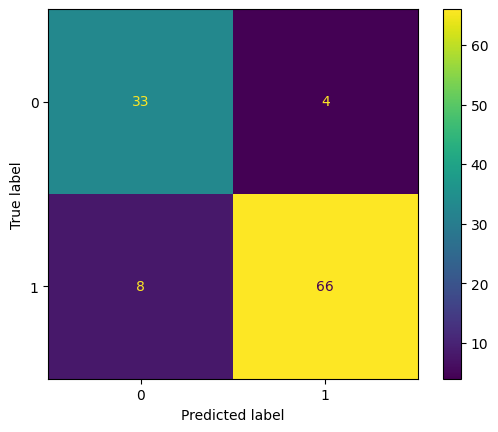

In [87]:
############# plot confusion matrix ############

from sklearn import metrics

cm = metrics.confusion_matrix(y_test, test_preds.round())
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()
# plt.imshow(cm, interpolation='nearest', cmap=plt.cm.pink)


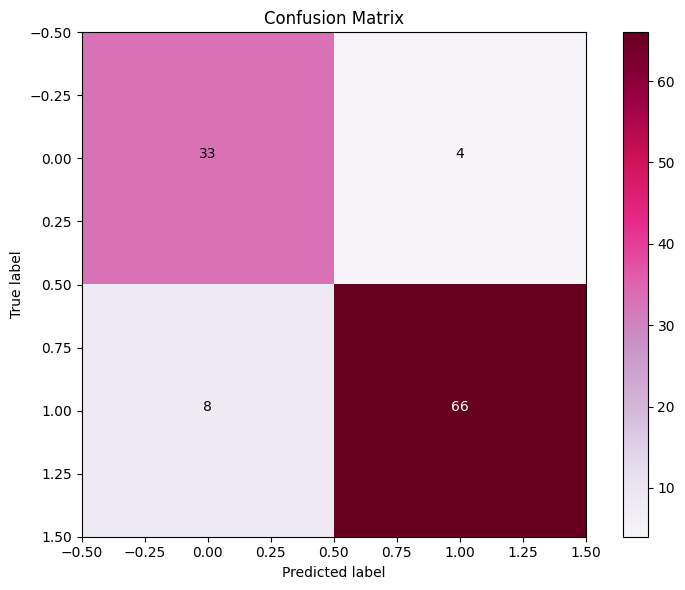

In [88]:
# Plot confusion matrix with custom color map

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.PuRd)  # Set cmap to custom color map
plt.title('Confusion Matrix')
plt.colorbar()

# Adding ticks and labels
# tick_marks = np.arange(len(cm))
# plt.xticks(tick_marks, ['Class 0', 'Class 1', 'Class 2','Class 3','Class 4','class 5','class 6'])
# plt.yticks(tick_marks, ['Class 0', 'Class 1', 'Class 2'])

# Adding annotations
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), #'d = integer
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout() #improves the layout of plots by preventing overlapping elements such as axis labels, tick labels, and titles
plt.show()